In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

import tensorflow as tf

<script type="text/javascript"<src="https://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS_HTML"></script>

In [2]:
# 定义一个随机数（标量）
random_float = tf.random.uniform(shape=())
print(random_float)

# 定义一个有2个元素的零向量
zero_vector = tf.zeros(shape=(2))
print(zero_vector)

# 定义两个2×2的常量矩阵
A = tf.constant([[1., 2.], [3., 4.]])
B = tf.constant([[5., 6.], [7., 8.]])

# 查看矩阵A的形状、类型和值
print(A.shape)      
print(A.dtype)      
print(A.numpy())

tf.Tensor(0.99873865, shape=(), dtype=float32)
tf.Tensor([0. 0.], shape=(2,), dtype=float32)
(2, 2)
<dtype: 'float32'>
[[1. 2.]
 [3. 4.]]


In [4]:
C = tf.add(A, B)    # 计算矩阵A和B的和
print(C)

D = tf.matmul(A, B) # 计算矩阵A和B的乘积
print(D)

tf.Tensor(
[[ 6.  8.]
 [10. 12.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)


## 自动求导机制

> TensorFlow 提供了强大的 自动求导机制 来计算导数。以下代码展示了如何使用 tf.GradientTape() 计算函数 y(x) = x^2 在 x = 3 时的导数：

* 变量x与普通张量的一个重要区别是其默认能够被 TensorFlow 的自动求导机制所求导，因此往往被用于定义机器学习模型的`参数`。
* tf.GradientTape() 是一个**自动求导的记录器**，在其中的变量和计算步骤都会被自动记录。

In [8]:
x = tf.Variable(initial_value=3.)
print(x)

with tf.GradientTape() as tape:     # 在 tf.GradientTape() 的上下文内，所有计算步骤都会被记录以用于求导
    y = tf.square(x)
y_grad = tape.gradient(y, x)        # 计算y关于x的导数
print([y, y_grad])

print(y.numpy())

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>
[<tf.Tensor: id=52, shape=(), dtype=float32, numpy=9.0>, <tf.Tensor: id=56, shape=(), dtype=float32, numpy=6.0>]
9.0


在机器学习中，更加常见的是对多元函数求偏导数，以及对向量或矩阵的求导。
以下代码展示了如何使用 `tf.GradientTape()` 计算函数 L(w, b) = \|\|Xw + b - y\|\|^2 在 w = (1, 2)^T, b = 1 时分别对 w, b 的偏导数。其中 
$ X = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix},  y = \begin{bmatrix} 1 \\ 2\end{bmatrix} $

In [10]:
X = tf.constant([[1., 2.], [3., 4.]])
y = tf.constant([[1.], [2.]])
w = tf.Variable(initial_value=[[1.], [2.]])
b = tf.Variable(initial_value=1.)
with tf.GradientTape() as tape:
    L = 0.5 * tf.reduce_sum(tf.square(tf.matmul(X, w) + b - y))
w_grad, b_grad = tape.gradient(L, [w, b])        # 计算L(w, b)关于w, b的偏导数
print([L.numpy(), w_grad.numpy(), b_grad.numpy()])

[62.5, array([[35.],
       [50.]], dtype=float32), 15.0]


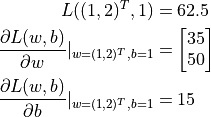

## 基础示例：线性回归

TensorFlow 帮助我们做了两件重要的工作：
* 使用 tape.gradient(ys, xs) 自动计算梯度；

* 使用 optimizer.apply_gradients(grads_and_vars) 自动更新模型参数。

In [15]:
import numpy as np

X_raw = np.array([2013, 2014, 2015, 2016, 2017], dtype=np.float32)
y_raw = np.array([12000, 14000, 15000, 16500, 17500], dtype=np.float32)

# 归一化
# y = ax + b
X = (X_raw - X_raw.min()) / (X_raw.max() - X_raw.min())
y = (y_raw - y_raw.min()) / (y_raw.max() - y_raw.min())

In [14]:
X = tf.constant(X)
y = tf.constant(y)

a = tf.Variable(initial_value=0.)
b = tf.Variable(initial_value=0.)
variables = [a, b]

num_epoch = 10000
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
for e in range(num_epoch):
    # 使用tf.GradientTape()记录损失函数的梯度信息
    with tf.GradientTape() as tape:
        y_pred = a * X + b
        loss = 0.5 * tf.reduce_sum(tf.square(y_pred - y))
    # TensorFlow自动计算损失函数关于自变量（模型参数）的梯度
    grads = tape.gradient(loss, variables)
    # TensorFlow自动根据梯度更新参数
    optimizer.apply_gradients(grads_and_vars=zip(grads, variables))

print(a, b)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.97637> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.057565063>
